# **H&M Personalized Fashion Recommendations**






**May 2024**

**Atoosa Rashid** 

[GitHub](https://github.com/atoosa-r/)

[LinkedIn](https://www.linkedin.com/in/atoosarashid/) 
___


### **Table of Contents:** 

- [Introduction](#introduction)

    - [Data Dictionary](#Data-Dictionary:)
    - [Articles Dataframe](#Articles-Dataframe)
    - [Transactions Dataframe](#Transactions-Dataframe)
    - [Customer Dataframe](#Customer-Dataframe)

- [Final Remarks](#Final-Remarks)

___

#### **Introduction**

In this exploratory data analysis (EDA), we examine H&M Group datasets encompassing transactions, customer information, and article details. H&M Group is a global family of brands and businesses with 53 online markets and approximately 4850 stores. The primary objective of this analysis is to uncover patterns and insights that can inform the development of effective product recommendations. The dataset encompasses a wide array of attributes, including garment type, customer demographics, product descriptions, and even image data. By understanding the structure and distribution of this data, we aim to enhance the shopping experience, helping customers make informed choices, thereby reducing returns and minimizing emissions from overconsumption and transportation.

___



In [139]:
#Importing libraries: 

import numpy as np                    #For numerial operations
import pandas as pd                   #For manipulating the dataframe
import matplotlib.pyplot as plt       #For basic plotting
import seaborn as sns                 #For statistical plotting 

from scipy import stats               #For probability and statistical functions
import statsmodels.api as sm          #For statistical modelling 



In [140]:
#Importing Dataframes:

articles_df=pd.read_csv("data/hm/articles.csv")                #Clothing articles 
transactions_df=pd.read_csv("data/hm/transactions_train.csv")  #Transaction information 
customers_df=pd.read_csv("data/hm/customers.csv")              #Customer information 

### **Data Dictionary:**

**articles df:**

Data on the articles of products in the transactions in transactions df by the customers in customer df.

- `article id`:int64, ID for each article. 
- `product_code`: int64, Code representing the product. 
- `prod_name`: object, Name of the product. 
- `product_type_no`: int64, Number representing the product type. 
- `product_type_name` : object, Name of the product type. 
- `product_group_name`: object, Group name of the product. 
- `graphical_appearance_no`: int64, Number representing the graphical appearance. 
- `graphical_appearance_name`: object, Name reopresenting the graphical appearance. 
- `colour_group_code`: int64, Code representing the colour group.
- `colour_group_name`: object, Name of the colour group.
- `perceived_colour_value_id`: int64, ID for perceived color value.
- `perceived_colour_value_name`: object, Name for perceived color value.
- `perceived_colour_master_id`: int64, ID for perceived color master.
- `perceived_colour_master_name`: object, Name for perceived color master.
- `department_no`: int64, Number representing the department.
- `department_name`:object, Name of the department.
- `index_code`: object, Code for the index.
- `index_name`: object, Name for the index
- `index_group_no`: int64, Number representing the index group
- `index_group_name`: object, Name of the index group. 
- `section_no`: int64, Number representing the section. 
- `section_name`: object, Name of the section 
- `garment_group_no`: int64, Number representing the graphical appearance.
- `garment_group_name`:object, Name of the graphical appearance.
- `detail_desc`: object

**customers df** 

Data on the customers involved in making the transactions found in transactions df and articles of products found in articles df.

- `customer_id`: object, individual unique customer id #. This column is also present in transactions df 
- `FN`: float64
- `Active`: float64 
- `club_member_status`: object 
- `fashion_news_frequency`: object 
- `age`: float64
 - `postal_code`: object 

**transactions df**

Data on the transactions being made to purchase the articles of products found in the articles df by the customers found in the customers df. Note: The prices are not real prices, they are altered.


- `t_dat`: object, transaction date
- `customer_id`: object, individual unique customer id #. This column is also present in customers df 
- `article_id`: int64
- `price`: float64


#### Initial remarks regarding dataframes: 
- The three dataframes are connected via the **transactions df**
- The **transactions df** is connected to our **articles df** (common column = `article_id`) and the **customers df** (common column = `customer_id`)
- The **article df** has 25 columns, many appear to be redundant. Some of the columns are duplicated as both a string and int, ex. `product_code` and `prod_name` or `department_no` and `department_name`. Depending on the modelling and analysis we continue with we can drop a few of these redundant columns. 
- The transactions df is very large with over 31 million rows. Depending on our analysis and modelling techniques we will reduce the number of rows either via the date of the `t_dat` (transaction date) or the `price`. 


- For the transactions df, it would be beneficial to add a units column, to count the number of units sold based on the unique `article_id`


____

#### **Articles Dataframe**

In [141]:
#Sanity Check:

articles_df.head(3)

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.


In [142]:
#Checking the shape of our articles dataframe: 

print(f"There are {articles_df.shape[0]} rows and {articles_df.shape[1]} columns in our dataframe. ")

There are 105542 rows and 25 columns in our dataframe. 


In [143]:
#Detailed info on all the columns:

articles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105542 non-null  int64 
 1   product_code                  105542 non-null  int64 
 2   prod_name                     105542 non-null  object
 3   product_type_no               105542 non-null  int64 
 4   product_type_name             105542 non-null  object
 5   product_group_name            105542 non-null  object
 6   graphical_appearance_no       105542 non-null  int64 
 7   graphical_appearance_name     105542 non-null  object
 8   colour_group_code             105542 non-null  int64 
 9   colour_group_name             105542 non-null  object
 10  perceived_colour_value_id     105542 non-null  int64 
 11  perceived_colour_value_name   105542 non-null  object
 12  perceived_colour_master_id    105542 non-null  int64 
 13 

In [144]:
#Checking for duplicates:

print(f'Duplicated columns: {articles_df.T.duplicated().any()}')

print(f'Duplicated rows: {articles_df.duplicated().any()}')

print(f'Total of duplicates: {articles_df.duplicated().sum()}')

Duplicated columns: False
Duplicated rows: False
Total of duplicates: 0


In [145]:
#Checking for null values: 

articles_df.isna().sum()

article_id                        0
product_code                      0
prod_name                         0
product_type_no                   0
product_type_name                 0
product_group_name                0
graphical_appearance_no           0
graphical_appearance_name         0
colour_group_code                 0
colour_group_name                 0
perceived_colour_value_id         0
perceived_colour_value_name       0
perceived_colour_master_id        0
perceived_colour_master_name      0
department_no                     0
department_name                   0
index_code                        0
index_name                        0
index_group_no                    0
index_group_name                  0
section_no                        0
section_name                      0
garment_group_no                  0
garment_group_name                0
detail_desc                     416
dtype: int64

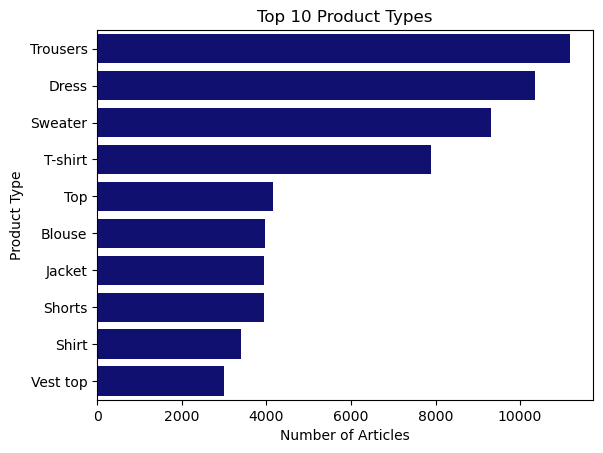

In [146]:
# Top 10 Articles by Product Type

product_type_counts = articles_df['product_type_name'].value_counts().head(10)
sns.barplot(x=product_type_counts.values, y=product_type_counts.index, color='navy')

plt.title('Top 10 Product Types')
plt.xlabel('Number of Articles')
plt.ylabel('Product Type')
plt.show()

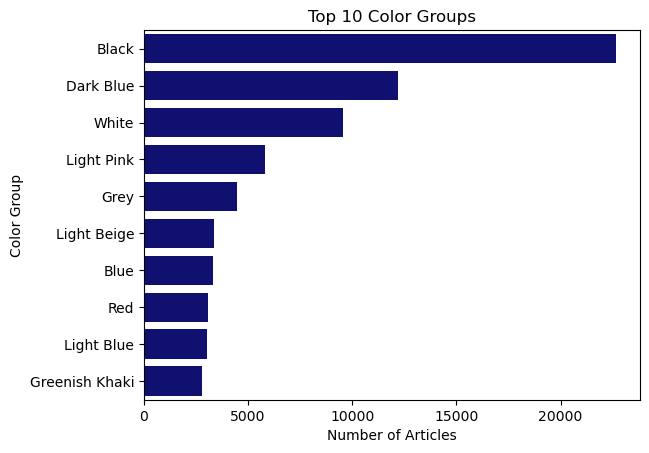

In [147]:
# Top 10 Articles by Color Group

color_group_counts = articles_df['colour_group_name'].value_counts().head(10)
sns.barplot(x=color_group_counts.values, y=color_group_counts.index,color='navy')

plt.title('Top 10 Color Groups')
plt.xlabel('Number of Articles')
plt.ylabel('Color Group')
plt.show()


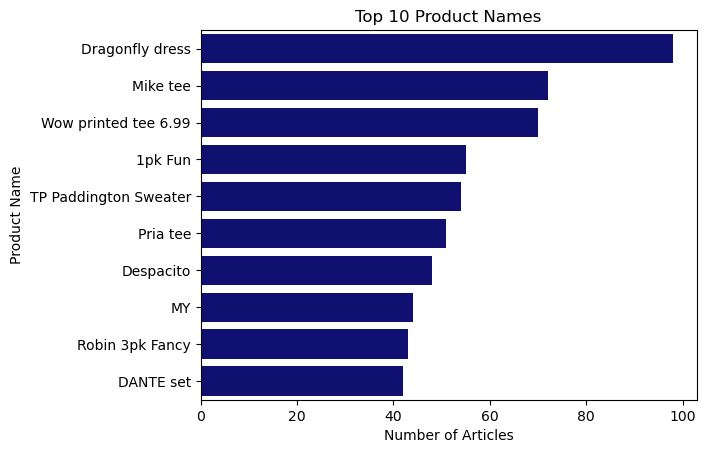

In [148]:
# Top 10 Articles by Product Names

product_name_counts = articles_df['prod_name'].value_counts().head(10)
sns.barplot(x=product_name_counts.values, y=product_name_counts.index, color='navy')

plt.title('Top 10 Product Names')
plt.xlabel('Number of Articles')
plt.ylabel('Product Name')
plt.show()

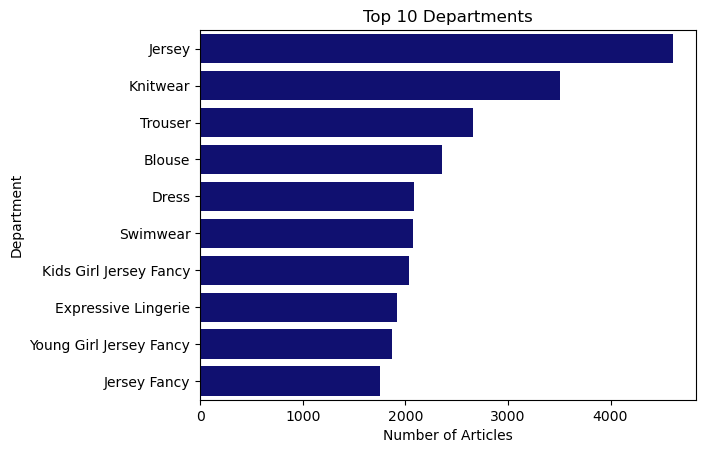

In [149]:
# Top 10 Articles by Department

department_counts = articles_df['department_name'].value_counts().head(10)
sns.barplot(x=department_counts.values, y=department_counts.index, color='navy')

plt.title('Top 10 Departments')
plt.xlabel('Number of Articles')
plt.ylabel('Department')
plt.show()

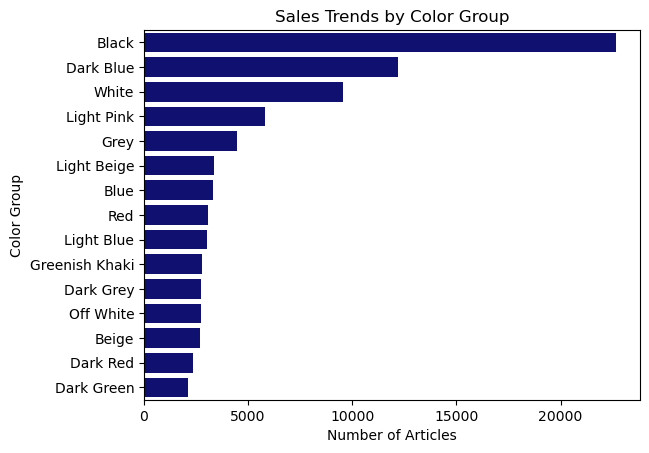

In [150]:
# Aggregating the data by colour group
color_group_sales = articles_df['colour_group_name'].value_counts().head(15)

# Plotting the top 15 articles by color group
sns.barplot(x=color_group_sales.values, y=color_group_sales.index, color='navy')

plt.title('Sales Trends by Color Group')
plt.xlabel('Number of Articles')
plt.ylabel('Color Group')
plt.show()

#### Checking Correlations

<Axes: title={'center': 'Feature-correlation (pearson)'}>

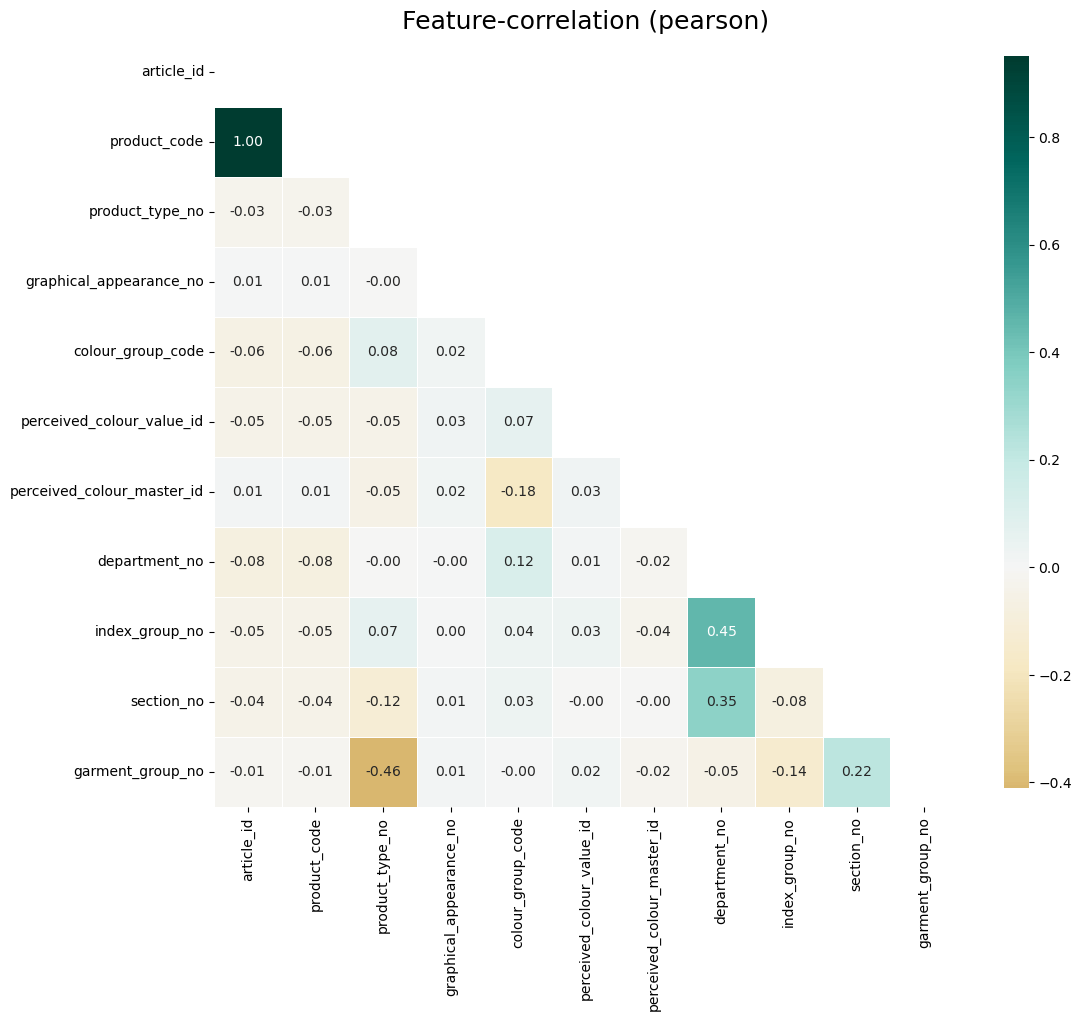

In [151]:
#Correlations
import klib

klib.corr_plot(articles_df)

Many of these columns are categorical so it is difficult to find any correlations. Also, many of the id numbers or codes overlap. 

___

### **Transations Dataframe**

In [152]:
#Sanity Check: 

transactions_df.head(3)

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2


In [153]:
# Converting t_dat column to datetime:

transactions_df['t_dat'] = pd.to_datetime(transactions_df['t_dat'])


In [154]:
# Finding the start and end date for the transactions column:

start_date = transactions_df['t_dat'].min()
end_date = transactions_df['t_dat'].max()

print(f'Our transactions in this dataframe are from {start_date} to {end_date}')


Our transactions in this dataframe are from 2018-09-20 00:00:00 to 2020-09-22 00:00:00


In [155]:
#Checking the shape of our transactions dataframe: 

print(f"There are {transactions_df.shape[0]} rows and {transactions_df.shape[1]} columns in our transactions dataframe. ")

# either cut based on price or year 

There are 31788324 rows and 5 columns in our transactions dataframe. 


In [156]:
# Calculating the minimum, maximum, and average price:

min_price = round(transactions_df['price'].min(), 5)
max_price = round(transactions_df['price'].max(), 5)
avg_price = round(transactions_df['price'].mean(), 5)

print(f'For the price column, the minimum price is {min_price}, the maximum is {max_price}, and the average price is {avg_price}.')


For the price column, the minimum price is 2e-05, the maximum is 0.59153, and the average price is 0.02783.


In [157]:
#Detailed info on all the columns:

transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31788324 entries, 0 to 31788323
Data columns (total 5 columns):
 #   Column            Dtype         
---  ------            -----         
 0   t_dat             datetime64[ns]
 1   customer_id       object        
 2   article_id        int64         
 3   price             float64       
 4   sales_channel_id  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 1.2+ GB


In [158]:
#Checking for null values: 

transactions_df.isna().sum()

t_dat               0
customer_id         0
article_id          0
price               0
sales_channel_id    0
dtype: int64

In [119]:
#Summary statistics for transactions_df:

transactions_df.describe().T

,count,mean,std,min,25%,50%,75%,max
article_id,31788324.0,6.962272e+08,1.334480e+08,1.087750e+08,6.328030e+08,7.145820e+08,7.865240e+08,9.562170e+08
price,31788324.0,2.782927e-02,1.918113e-02,1.694915e-05,1.581356e-02,2.540678e-02,3.388136e-02,5.915254e-01
sales_channel_id,31788324.0,1.704028e+00,4.564786e-01,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00


**Note: This dataframe will need to be reduced in order to be able to perform our data analysis more effectiely.** 

The method for reducing the size will depend on our data analysis. A few options include:
- Reducing by timeframe: The dataframe includes data from 2018-09-20 to 2020-09-22, we could reduce it to only one year instead of two. 
- Reducing based on price: The dataframe could be reduced based on the price of the transactions, we could either focus on the lower end or higher end. 


____

#### **Customers Dataframe**

In [35]:
#Sanity Check:

customers_df.head(3)

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...


In [36]:
#Checking the shape of our customers dataframe: 

print(f"There are {customers_df.shape[0]} rows and {customers_df.shape[1]} columns in our dataframe. ")

There are 1371980 rows and 7 columns in our dataframe. 


In [37]:
#Summary statistics for customers_df:

customers_df.describe().T

,count,mean,std,min,25%,50%,75%,max
FN,476930.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
Active,464404.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
age,1356119.0,36.386965,14.313628,16.0,24.0,32.0,49.0,99.0


In [38]:
#Detailed info on all the columns:

customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1371980 non-null  object 
 1   FN                      476930 non-null   float64
 2   Active                  464404 non-null   float64
 3   club_member_status      1365918 non-null  object 
 4   fashion_news_frequency  1355969 non-null  object 
 5   age                     1356119 non-null  float64
 6   postal_code             1371980 non-null  object 
dtypes: float64(3), object(4)
memory usage: 73.3+ MB


**Let's take a look at the null values present in this dataframe.** 

In [47]:
#Checking for null values: 

customers_df.isna().sum()

customer_id                    0
FN                        895050
Active                    907576
club_member_status          6062
fashion_news_frequency     16011
age                        15861
postal_code                    0
dtype: int64

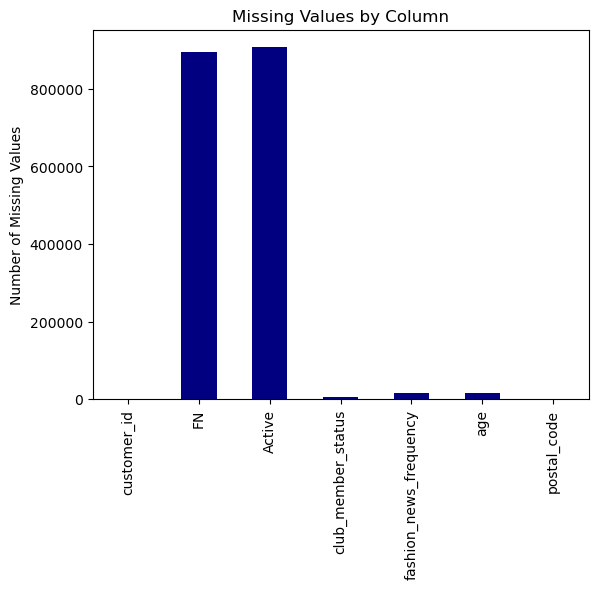

In [161]:
#Plotting Null or Missing values

missing_values = customers_df.isna().sum()
missing_values.plot(kind='bar', title='Missing Values by Column', color='navy')
plt.ylabel('Number of Missing Values')
plt.show()

Most of our null values are regarding our `Active` membership and `FN` which is the fashion news updates. This may be due to customers that have yet to make an account or made order without an account. Customers may have also ignored or passed throug the selection options to sign up for fashion news updates. These missing values can be dealt with when we start our analysis. They don't seem to hold very much valuable information since they don't provide any further demographic or transactional information regarding the customers or articles of clothing.  

**Let's take a look at our `Age` distribution and take a closer look at the age demographic of our customers** 

In [181]:
# Calculating median and mode
median_age = customers_df['age'].median()
mode_age = customers_df['age'].mode()[0] # taking the first most occuring mode age 

print(f'The median age is {median_age} but the mode age is {mode_age}. ')


The median age is 32.0 but the mode age is 21.0. 


Average age of our customers is 36 years old but the mode is 21 years old. It is more clear why this discrepancy exists after viewing the graph of the distribution below. The age distribution is not a normal distribution since it has a right tail. In this case, average age may not be the most accurate measure of our customer population. 

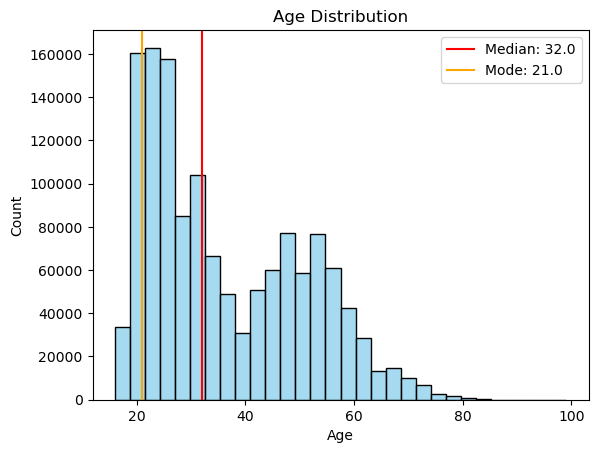

In [183]:
# Age distribution

sns.histplot(data=customers_df, x= 'age', bins=30, color='skyblue')
plt.axvline(median_age, color='red',label=f'Median: {median_age}')
plt.axvline(mode_age, color='orange',label=f'Mode: {mode_age}')

plt.title('Age Distribution')
plt.xlabel('Age')
plt.legend()
plt.show()

Majority of the customers are below 45, with the peak group being within the range of 20-30 years old. When working with the data and finding recommendations and methods it will be important to take into account our young demographic.

**Looking into the membership program and the status of the customers in the data set.**

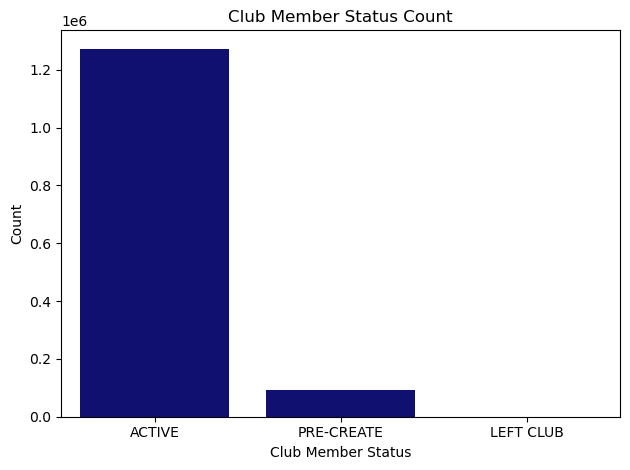

In [80]:
# Club member status count
sns.countplot(x='club_member_status', data=customers_df, color='navy')
plt.xlabel('Club Member Status')
plt.ylabel('Count')
plt.title('Club Member Status Count')
plt.tight_layout()
plt.show()


Majority of the data includes active members of the membership program. This is likely due to the fact that most customers making transaction will likely make an account and automatically be signed up for the membership program in order to keep track of their orders

**Taking a look at how often customers like to receive fashion news.**

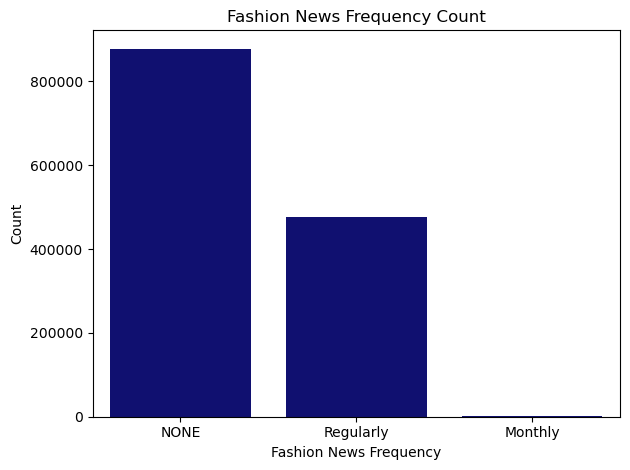

In [81]:
#Fashion News Frequency 

sns.countplot(x='fashion_news_frequency', data=customers_df, color='navy')
plt.title('Fashion News Frequency Count')
plt.xlabel('Fashion News Frequency')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

Majority of customers do not want to receive fashion news. This will be important when we consider our recommendation systems and how we may apply them and inform customers of new products that may fit their preferences. 

### **Summaries of Data Frames**

**Let's take a very broad overall view of the dataframes:**

In [163]:
from summarytools import dfSummary
dfSummary(customers_df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,customer_id[object],1. 00000dbacae5abe5e23885899a1fa42. aaabd1b7c85e6139d6c80addf788b13. aaabafd8f1490fb3cb830f363c76654. aaabad72467637cd672a021d2699c25. aaab82bd88837ce6490c66c82954aa6. aaab6eaf65084a79dea664f7c5ec7d7. aaab67f48815afa6a80256086069cc8. aaab51edaafb9a3fb9876af455a80d9. aaab4cfa3d8cfc67338145f254387b10. aaab4a2eed0a1247e2bd6fc853aa4711. other,"1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1,371,970 (100.0%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy81sbWrAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADLklEQVR4nO3cwY3TYBRG0ecogmFja2QpJUAPKYItvdOFNzCswoIeriVzTgX/4kpPkfxleb1eA4Xb2Q/g/yE2MmIjIzYyYiMjNjJiIyM2MmIjIzYyt2VZvi3L8nb2Q7i+28x8nZnPZz+E63NGyYiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI3MbWZ+zsyfsx/C9S3+xYiKM0pGbGSsq8hYV5FxRsmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyBi8kDF4IeOMkhEbGYMXMgYvZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IOKNkxEZGbGSsq8hYV5FxRsmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyFhXkbGuIuOMkhEbGYMXMgYvZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IOKNkxEbG4IWMwQsZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyFhXkbGuIuOMkhEbGesqMtZVZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IOKNkxEbG4IWMwQsZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzBCxmDFzLOKBmxkREbGesqMtZVZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYy1lVkrKvIOKNkxEbG4IWMwQsZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzBCxmDFzLOKJllZr7MzKezH8L13fd9/76u6/vZD+H67uu6vj+fz9/btn2c/Riu6ziOt/vMzLZtH4/H49fZD+La/EAgIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjc5/59/nH2Q/h2o7jeFv2ff/h40kKPgsnY11Fxg8EMmIjIzYyYiMjNjJiIyM2MmIjIzYyfwFj50uCzHpkKgAAAABJRU5ErkJggg=="">",0(0.0%)
2,FN[float64],1. nan2. 1.0,"895,050 (65.2%)476,930 (34.8%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy81sbWrAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABO0lEQVR4nO3bwWnDQBRF0TdBmHgzQghUjIpIsSliuhFCs4iNN8rCkJC9/cb6uaeCb3wR2Oilfd8FOCRJZ0mn1ofgj9u+75fWRzxaN47jR855aH0IftVa15TSZ7TgupzzMM/zpe/7a+tjIG3b9l5KGZZlOUmKFZsk9X1/nabpq/Ux+HFufcAzvLU+AP8HscGG2GBDbLAhNtgQG2yIDTbEBhtigw2xwYbYYENssCE22BAbbIgNNp10f2Gv9SG4i/xddLXWtZQyKOgLe0dUa10l3Vrf8WgMXl5TyMFLYsoHl8hPtpBPhyMLO+WLOoc7spBTvshzuCOLPOXj1/WL4U9d2BAbbIgNNsQGG2KDDbHBhthgQ2ywITbYEBtsiA02xAYbYoMNscGG2GATcsoX7fNEEXbKF3UOd2QMXmDzDQpbat+zDfyfAAAAAElFTkSuQmCC"">","895,050(65.2%)"
3,Active[float64],1. nan2. 1.0,"907,576 (66.2%)464,404 (33.8%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy81sbWrAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABOklEQVR4nO3bMWrDQBRF0T9BmLiZQQi0GC8ii80itBshNEVs3EyKFCE4pXhjnu9ZwTe+CGz0UmstAIUUEeeIOPU+BP+6t9auvY84yjBN00fOeex9CB7VWreU0qdLcEPOebxcLtdSyq33Mfi17/v7sizjuq6niPCILSKilHKb5/mr9zF4cO59wJHeeh+A10FskCE2yBAbZIgNMsQGGWKDDLFBhtggQ2yQITbIEBtkiA0yxAYZYoPMEPHzol7vQ/CX43cy1Fq3ZVnGMHtRz0GtdYuIe+87jsLg5blZDV4SUz6oOD7ZrJ4GTuymfG7zNydWUz7H+ZsTxykfv6qfFH/qQobYIENskCE2yBAbZIgNMsQGGWKDDLFBhtggQ2yQITbIEBtkiA0yxAYZqymfy+dwZTflc5u/OWHwAplvCltq31B2yb4AAAAASUVORK5CYII="">","907,576(66.2%)"
4,club_member_status[object],1. ACTIVE2. PRE-CREATE3. nan4. LEFT CLUB,"1,272,491 (92.7%)92,960 (6.8%)6,062 (0.4%)467 (0.0%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABcCAYAAAB5jMeAAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy81sbWrAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAB9klEQVR4nO3cMW6bcBjG4Q8Lpc0CspByhPYOPkQO20NwiN7BsszQpFnokGTxUmjEa8V9npnhP/yEjcXrZp7ngoTdtQ/A/0NsxDRVdV9Vd9c+CJ/WyzzPT0subIdheOy6br/1ibhN0zSdmqb5sSS4tuu6/eFweOr7/jlxOG7H+Xz+Oo7j/ng83lXV32Orqur7/vnh4eHX5qfjFt0vvdADAjFiI0ZsxIiNGLERIzZixEaM2IgRGzFiI0ZsxIiNGLER01a9vipy7YPw+aztpp2m6TSO475WvCoC76ZpOlXVy5JrvRbORy1+Lbwx5SPFAwIxaz9GF98y4dKqddWa

- As previously noted the `FN` and `Active` column contain the most null values, we're missing 65% and 66% of those values 
- We can once again see our club member distribution here, over 92% are signed up as active members 
- In this set 8.8% of our customers come from the same postal code 

In [159]:
from summarytools import dfSummary
dfSummary(articles_df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,article_id[int64],Mean (sd) : 698424569.1 (128462381.3)min < med < max:108775015.0 < 702213001.5 < 959461001.0IQR (CV) : 179710500.8 (5.4),"105,542 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy81sbWrAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACtElEQVR4nO3dv27aUBSA8XMhBAPGFiDBxtKNSB0YeYCOfdg+QgZeoKxMbBYImeLGwhh3aqVIaRL/E/dY32/OBQ+fIL4H2ybLMgFs17r3AQCf8XDvA8BrxpieiDyWeIlLlmUvVR2PLQjVIsaY3mQy+e553qjoa5xOp6Mx5kfTYiVUuzx6njdarVYvvu/HeReHYeis1+vR4XB4FBFCRb1834+n0+nvgst7lR6MJTiZggqEChX46m+YNE07IuIZY4ost3bHgFAbJIqiTpIkX+fzebvdbuc+GbN5x4BQG+RyuTw4jtNfLpfxbDY75llr+44BoTbQYDAoumtg7Y4BJ1NQgVChAqFCBUKFCoQKFQgVKrA9hX9KTrVEapxsESpEpPxUS6TeyRahQkTKTbVE6p9sESpeKTHVEqlxssXJFFQgVKhAqFCB/1FrUOKSZ+92u3WqPp4mINSKlbnkOUkSJ03TpziOn0Wk6AlNIxFq9Qpf8rzb7UabzaZ/vV7bdR2cVoRakyKXPB+PR2t/uHxvnExBBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqcHEfKlPnw9gIFZWo+2FshIpK1P0wNkJFpep6GBuh/gf3j7ILob6B+0fZh1Dfxv2jLEOo7+D+UfZgwx8qECpUIFSoQKhQgVChAqFCBUKFCoQKFRq74V9iVi/CvN46jQy1zKxehHm9jawOtcwvmFzXna5Wq1PeWb0I83obfRhqya/QlojcCq51xuPxN9/3B3kX/v1E7Ha7z0V+G8m83j7vhlrmKzRN004URV9c1922Wq0k7/okSRwReVosFj+Hw+GvPGv3+72z3W77YRgOgiC45H3v8/nsiIhEUeQEQdDXsFbze4dh6Hz0N38A5vRRKFS3cv0AAAAASUVORK5CYII="">",0(0.0%)
2,product_code[int64],Mean (sd) : 698424.6 (128462.4)min < med < max:108775.0 < 702213.0 < 959461.0IQR (CV) : 179710.5 (5.4),"47,224 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy81sbWrAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACtElEQVR4nO3dv27aUBSA8XMhBAPGFiDBxtKNSB0YeYCOfdg+QgZeoKxMbBYImeLGwhh3aqVIaRL/E/dY32/OBQ+fIL4H2ybLMgFs17r3AQCf8XDvA8BrxpieiDyWeIlLlmUvVR2PLQjVIsaY3mQy+e553qjoa5xOp6Mx5kfTYiVUuzx6njdarVYvvu/HeReHYeis1+vR4XB4FBFCRb1834+n0+nvgst7lR6MJTiZggqEChX46m+YNE07IuIZY4ost3bHgFAbJIqiTpIkX+fzebvdbuc+GbN5x4BQG+RyuTw4jtNfLpfxbDY75llr+44BoTbQYDAoumtg7Y4BJ1NQgVChAqFCBUKFCoQKFQgVKrA9hX9KTrVEapxsESpEpPxUS6TeyRahQkTKTbVE6p9sESpeKTHVEqlxssXJFFQgVKhAqFCB/1FrUOKSZ+92u3WqPp4mINSKlbnkOUkSJ03TpziOn0Wk6AlNIxFq9Qpf8rzb7UabzaZ/vV7bdR2cVoRakyKXPB+PR2t/uHxvnExBBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqcHEfKlPnw9gIFZWo+2FshIpK1P0wNkJFpep6GBuh/gf3j7ILob6B+0fZh1Dfxv2jLEOo7+D+UfZgwx8qECpUIFSoQKhQgVChAqFCBUKFCoQKFRq74V9iVi/CvN46jQy1zKxehHm9jawOtcwvmFzXna5Wq1PeWb0I83obfRhqya/QlojcCq51xuPxN9/3B3kX/v1E7Ha7z0V+G8m83j7vhlrmKzRN004URV9c1922Wq0k7/okSRwReVosFj+Hw+GvPGv3+72z3W77YRgOgiC45H3v8/nsiIhEUeQEQdDXsFbze4dh6Hz0N38A5vRRKFS3cv0AAAAASUVORK5CYII="">",0(0.0%)
3,prod_name[object],1. Dragonfly dress2. Mike tee3. Wow printed tee 6.994. 1pk Fun5. TP Paddington Sweater6. Pria tee7. Despacito8. MY9. Robin 3pk Fancy10. DANTE set11. other,"98 (0.1%)72 (0.1%)70 (0.1%)55 (0.1%)54 (0.1%)51 (0.0%)48 (0.0%)44 (0.0%)43 (0.0%)42 (0.0%)104,965 (99.5%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy81sbWrAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADQklEQVR4nO3cwWkbYRRG0TdCJPZGQghUQtKDisg2HauINGGkReJ44yyCS8gdmJxTwb+48BDMp+X9/X2gsFv7Afw/xEZGbGTERkZsZMRGRmxkxEZGbGTERma3LMvXZVme1n4I27ebmS8z83nth7B9zigZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkdnNzI+Z+b32Q9i+xb8YUXFGyYiNjHUVGesqMs4oGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZgxcyBi9knFEyYiNj8ELG4IWMM0pGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERsbghYzBCxlnlIzYyIiNjHUVGesqMs4oGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZ6yoy1lVknFEyYiNj8ELG4IWMM0pGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERsbghYzBCxlnlIzYyBi8kDF4IeOMkhEbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZ6yoy1lVknFEyYiNjXUXGuoqMM0pGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERsbghYzBCxlnlIzYyBi8kDF4IeOMkhEbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRMXghY/BCxhklIzYyYiNjXUXGuoqMM0pGbGTERkZsZMRGRmxkxEZGb

- Majority of the columns found in this dataframe are categorical so the numerical summaries should not be taken into consideration 
- Many trends are presented based on colour, garment groups, departmnents, and product type 
- As mentioned previously there are redunant columns present and it would be beneficial to drop a few of these columns when doing further analysis

___

#### **Final Remarks**

The EDA reveals significant trends and characteristics within the dataset. The insights gained from this preliminary analysis lay the foundation for more sophisticated modeling and predictive analytics, ensuring that our approach is data-driven and well-informed. Ultimately, this analysis will aid in developing robust product recommendations that enhance the shopping experience and contribute positively to sustainability.


Going forward, we will need to consider the following:
- Redundant columns, which will be dropped to streamline subsequent processes
- Taking care of null-values present, if necessary
- Reducing size of transactions_df
- Finding and figuring out appropriate modeling and predictive methods 


